In [1]:
from Architectures.AE import AE
from Data.load import load
from matplotlib import pyplot as plt
import numpy as np

In [2]:
train, test = load("Pre-processed")

Loading images: 100%|██████████| 496/496 [03:14<00:00,  2.55it/s]


In [2]:
latent_dim = 100
ae = AE(train.shape,halvings=4, init_hidden_depth=8, hidden_depth_grow_factor=4, latent_dim=latent_dim, output_activation="tanh")

NameError: name 'train' is not defined

-0.24630224836323766 0.9324894939184067


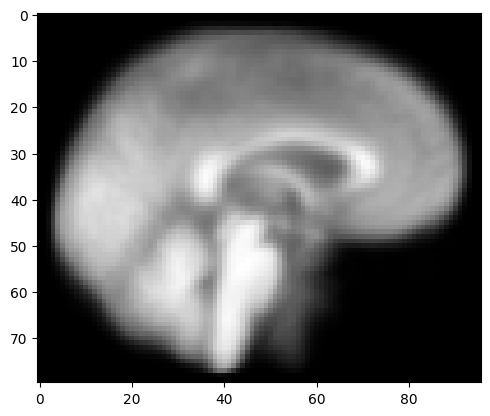

In [4]:
# Train on the diff to the mean brain instead
mean_brain = np.mean(train, axis=0)
diff_train = train - 0.5*mean_brain
diff_test = test - 0.5*mean_brain
plt.imshow(np.rot90(mean_brain[40]),cmap="gray") # diff_train[0][40]
print(np.min(diff_train), np.max(diff_train))

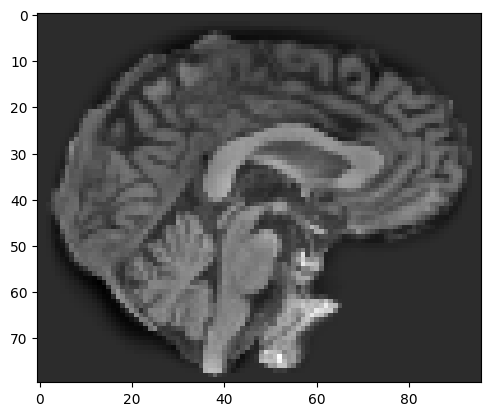

In [100]:
plt.imshow(np.rot90(diff_train[0][40]),cmap="gray")

In [5]:
ae.train(diff_train, epochs=30, batch_size=20)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - loss: 0.0218 - val_loss: 0.0161
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - loss: 0.0150 - val_loss: 0.0095
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - loss: 0.0095 - val_loss: 0.0072
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - loss: 0.0081 - val_loss: 0.0068
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - loss: 0.0076 - val_loss: 0.0061
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - loss: 0.0066 - val_loss: 0.0060
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - loss: 0.0062 - val_loss: 0.0055
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - loss: 0.0055 - val_loss: 0.0053
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - loss: 0.0053 - val_loss: 0.0050
Epoch 10/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - loss: 0.0051 - val_loss: 0.0050
Epoch 11/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - loss: 0.0048 - val_loss: 0.0049
Epoch 12/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - loss: 0.0048 - val_lo

In [7]:
ae.save(f"Trained Models/AE/{latent_dim}")

Models saved to Trained Models/AE/100


In [5]:
from Metrics.metrics import MSE
# Find the best latent dim?
dims = [10, 30, 50, 100, 300, 500, 1000]
loss = []
for latent_dim in dims:
    ae_ = AE(train.shape,halvings=4, latent_dim=latent_dim, output_activation="tanh")
    ae_.train(diff_train, epochs=60, batch_size=20)
    latent = ae_.encode(diff_test)
    recon = ae_.decode(latent)
    loss.append(MSE(diff_test, recon))
    ae_.save(f"Trained Models/Loss Comparison/dim-{latent_dim}")
import json


Interpreted image shape: (80, 96, 80, 1)
Pre-flattened latent shape: (None, 5, 6, 5, 64)


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 80, 96, 80, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 10)             │       168,922 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 80, 96, 80, 1)  │       289,105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 458,027 (1.75 MB)

 Trainable params: 458,027 (1.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 754ms/step - loss: 0.0205 - val_loss: 0.0096
Epoch 2/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 689ms/step - loss: 0.0103 - val_loss: 0.0073
Epoch 3/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 676ms/step - loss: 0.0072 - val_loss: 0.0062
Epoch 4/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 674ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 5/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 671ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 6/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 672ms/step - loss: 0.0056 - val_loss: 0.0057
Epoch 7/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 670ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 8/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 678ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 9/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 681ms/step - loss: 0.0055 - val_loss: 0.0052
Epoch 10/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 670ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 11/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 671ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 12/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 80, 96, 80, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 30)             │       360,942 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 80, 96, 80, 1)  │       481,105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 842,047 (3.21 MB)

 Trainable params: 842,047 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 980ms/step - loss: 0.0151 - val_loss: 0.0079
Epoch 2/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 715ms/step - loss: 0.0090 - val_loss: 0.0069
Epoch 3/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 684ms/step - loss: 0.0071 - val_loss: 0.0061
Epoch 4/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 682ms/step - loss: 0.0060 - val_loss: 0.0055
Epoch 5/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 676ms/step - loss: 0.0055 - val_loss: 0.0051
Epoch 6/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 666ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 7/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 669ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 8/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 671ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 9/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 668ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 10/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 666ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 11/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 664ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 12/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 80, 96, 80, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 50)             │       552,962 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 80, 96, 80, 1)  │       673,105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,226,067 (4.68 MB)

 Trainable params: 1,226,067 (4.68 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - loss: 0.0153 - val_loss: 0.0080
Epoch 2/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 712ms/step - loss: 0.0089 - val_loss: 0.0069
Epoch 3/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 710ms/step - loss: 0.0070 - val_loss: 0.0064
Epoch 4/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 712ms/step - loss: 0.0061 - val_loss: 0.0058
Epoch 5/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 708ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 6/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 699ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 7/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 708ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 8/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 698ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 9/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 726ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 10/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 705ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 11/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 698ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 12/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 6

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 80, 96, 80, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 100)            │     1,033,012 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 80, 96, 80, 1)  │     1,153,105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,186,117 (8.34 MB)

 Trainable params: 2,186,117 (8.34 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 34s 935ms/step - loss: 0.0185 - val_loss: 0.0111
Epoch 2/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 710ms/step - loss: 0.0110 - val_loss: 0.0081
Epoch 3/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 700ms/step - loss: 0.0080 - val_loss: 0.0074
Epoch 4/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 702ms/step - loss: 0.0072 - val_loss: 0.0069
Epoch 5/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 701ms/step - loss: 0.0069 - val_loss: 0.0064
Epoch 6/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 696ms/step - loss: 0.0063 - val_loss: 0.0061
Epoch 7/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 674ms/step - loss: 0.0061 - val_loss: 0.0058
Epoch 8/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 679ms/step - loss: 0.0055 - val_loss: 0.0056
Epoch 9/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 675ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 10/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 710ms/step - loss: 0.0054 - val_loss: 0.0055
Epoch 11/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 716ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 12/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 80, 96, 80, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 300)            │     2,953,212 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 80, 96, 80, 1)  │     3,073,105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,026,317 (22.99 MB)

 Trainable params: 6,026,317 (22.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - loss: 0.0218 - val_loss: 0.0127
Epoch 2/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 756ms/step - loss: 0.0126 - val_loss: 0.0112
Epoch 3/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 752ms/step - loss: 0.0107 - val_loss: 0.0094
Epoch 4/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 774ms/step - loss: 0.0091 - val_loss: 0.0080
Epoch 5/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 743ms/step - loss: 0.0077 - val_loss: 0.0070
Epoch 6/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 746ms/step - loss: 0.0066 - val_loss: 0.0061
Epoch 7/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 748ms/step - loss: 0.0060 - val_loss: 0.0056
Epoch 8/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 741ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 9/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 734ms/step - loss: 0.0051 - val_loss: 0.0054
Epoch 10/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 774ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 11/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 791ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 12/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 6

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 80, 96, 80, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 500)            │     4,873,412 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 80, 96, 80, 1)  │     4,993,105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,866,517 (37.64 MB)

 Trainable params: 9,866,517 (37.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - loss: 0.0457 - val_loss: 0.0201
Epoch 2/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 733ms/step - loss: 0.0189 - val_loss: 0.0162
Epoch 3/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 712ms/step - loss: 0.0160 - val_loss: 0.0144
Epoch 4/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 712ms/step - loss: 0.0143 - val_loss: 0.0130
Epoch 5/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 711ms/step - loss: 0.0127 - val_loss: 0.0117
Epoch 6/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 703ms/step - loss: 0.0114 - val_loss: 0.0105
Epoch 7/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 710ms/step - loss: 0.0106 - val_loss: 0.0098
Epoch 8/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 699ms/step - loss: 0.0097 - val_loss: 0.0094
Epoch 9/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 702ms/step - loss: 0.0093 - val_loss: 0.0090
Epoch 10/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 699ms/step - loss: 0.0089 - val_loss: 0.0088
Epoch 11/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 701ms/step - loss: 0.0087 - val_loss: 0.0085
Epoch 12/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 7

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 80, 96, 80, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 1000)           │     9,673,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 80, 96, 80, 1)  │     9,793,105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,467,017 (74.26 MB)

 Trainable params: 19,467,017 (74.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - loss: 0.0414 - val_loss: 0.0317
Epoch 2/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 779ms/step - loss: 0.0303 - val_loss: 0.0243
Epoch 3/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 756ms/step - loss: 0.0236 - val_loss: 0.0208
Epoch 4/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 759ms/step - loss: 0.0201 - val_loss: 0.0176
Epoch 5/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 753ms/step - loss: 0.0169 - val_loss: 0.0148
Epoch 6/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 747ms/step - loss: 0.0143 - val_loss: 0.0124
Epoch 7/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 789ms/step - loss: 0.0119 - val_loss: 0.0109
Epoch 8/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 771ms/step - loss: 0.0108 - val_loss: 0.0100
Epoch 9/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 767ms/step - loss: 0.0099 - val_loss: 0.0093
Epoch 10/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 782ms/step - loss: 0.0093 - val_loss: 0.0088
Epoch 11/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 806ms/step - loss: 0.0088 - val_loss: 0.0084
Epoch 12/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 7

FileNotFoundError: [Errno 2] No such file or directory: 'Cache/loss_per_latent_dim.json'

Text(0, 0.5, 'Reconstruction loss')

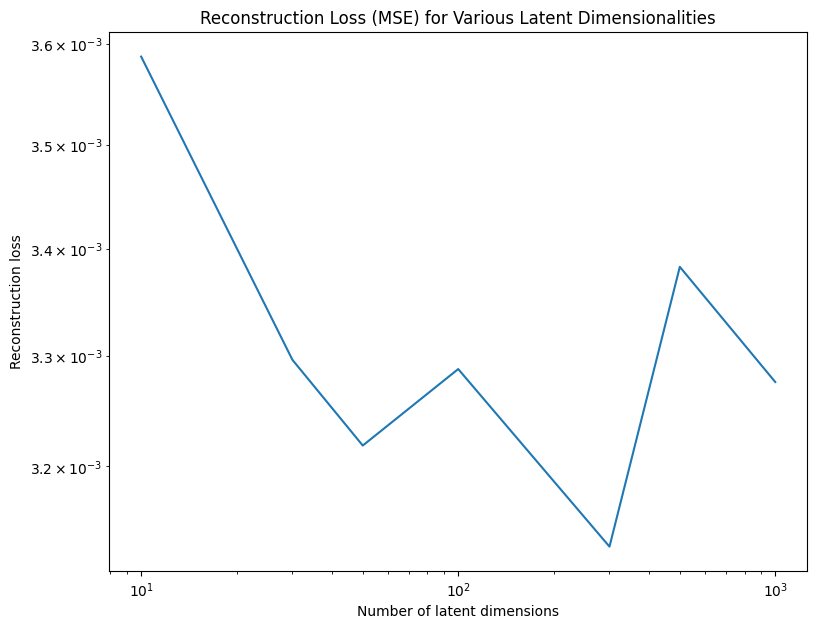

In [6]:

json.dump({"dims":dims,"loss":loss},open("Cache/loss_per_latent_dim.json","w"))

plt.figure(figsize=(9,7))
plt.plot(dims,loss)
plt.xscale("log")
plt.yscale("log")
plt.title("Reconstruction Loss (MSE) for Various Latent Dimensionalities")
plt.xlabel("Number of latent dimensions")
plt.ylabel("Reconstruction loss")

In [104]:
ae.save("Trained Models/large-360")

Models saved to TrainedModels/Temp


In [117]:
latent = ae.encode(diff_test)
recon = ae.decode(latent)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


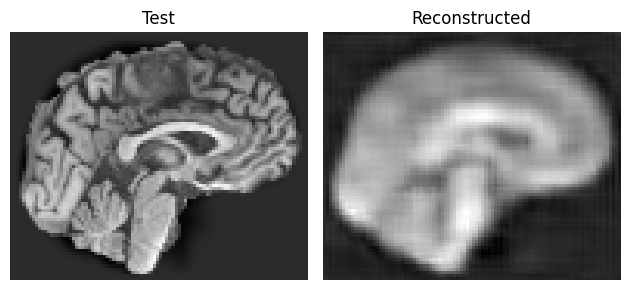

In [123]:
test_id = 1
plt.subplot(1, 2, 1)
plt.imshow(np.rot90(diff_test[test_id][40].reshape((96, 80))), cmap="gray")
plt.title("Test")
plt.axis('off')  # Hide axes for a cleaner look

plt.subplot(1, 2, 2)
plt.imshow(np.rot90(recon[test_id][40]), cmap="gray")
plt.title("Reconstructed")
plt.axis('off')  # Hide axes for a cleaner look
plt.tight_layout()  # Adjust layout for better spacing


In [7]:
from Metrics.metrics import NMSE, SSIM
SSIM(recon.reshape(diff_test.shape), diff_test)

0.47985097879764366

Retained variance 0.9821266252547503
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


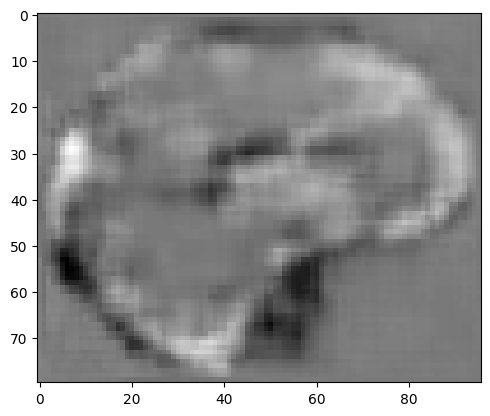

In [30]:
from sklearn.decomposition import PCA

pca=PCA(7)
pca_latent = pca.fit_transform(latent)
print("Retained variance",sum(pca.explained_variance_ratio_))
pca_recon = ae.decode(pca.inverse_transform(pca_latent))
plt.imshow(np.rot90(pca_recon[0][40].reshape((96,80))),cmap="gray") # mean_brain[40]+

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Retained variance 0.37408386170864105
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step


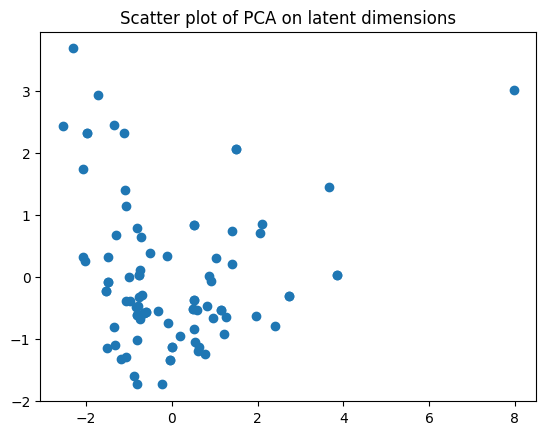

In [23]:
pca=PCA(2) # We need ca 50. 2 components is far too little.
latent = ae.encode(diff_train)
pca_latent = pca.fit_transform(latent)
print("Retained variance",sum(pca.explained_variance_ratio_))
pca_recon = ae.decode(pca.inverse_transform(pca_latent))

plt.title("Scatter plot of PCA on latent dimensions")
plt.scatter(pca_latent[:,0],pca_latent[:,1])

There's an outlier at x>5! Let's check it out :)

In [ ]:
idx = np.where(pca_latent[:,0] > 5)[0][0]
plt.imshow(np.rot90(train[idx][40]),cmap="gray")

NameError: name 'pca_latent' is not defined

: 

Wth is wrong with this guy like half his brain is cut out behind???

In [10]:
ae.encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 32, 32, 4, 1)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_25 (Conv3D)              │ (None, 16, 16, 2, 12)  │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16, 16, 2, 12)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_26 (Conv3D)              │ (None, 8, 8, 1, 36)    │        11,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 8, 8, 1, 36)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4096)           │     9,441,280 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,453,316 (36.06 MB)

 Trainable params: 9,453,316 (36.06 MB)

 Non-trainable params: 0 (0.00 B)

Pre-flattened latent shape: (None, 8, 8, 1, 96)


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 32, 32, 4, 1)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 4096)           │    25,201,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 32, 32, 4, 1)   │    25,452,337 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,653,793 (193.23 MB)

 Trainable params: 50,653,793 (193.23 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


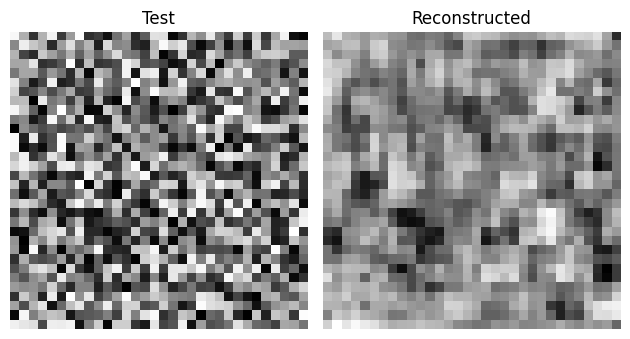

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


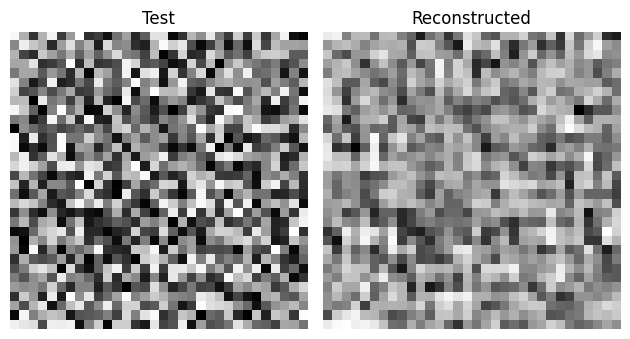

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


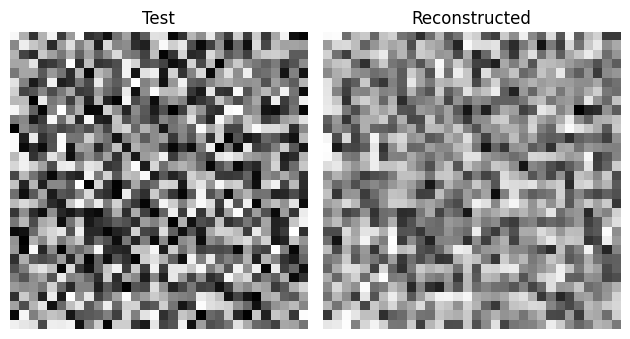

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


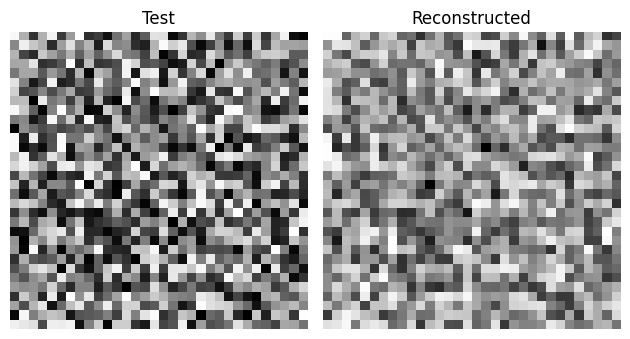

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


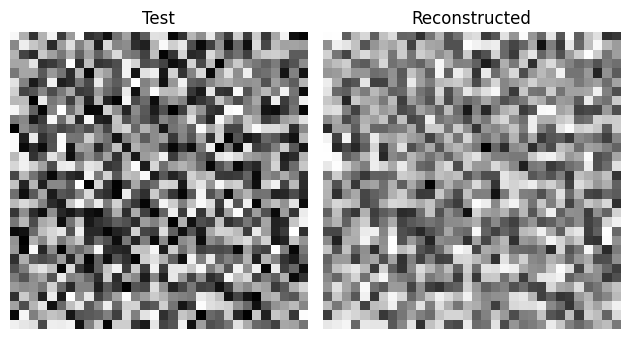

In [7]:
test_noisy_image = np.random.random((32,32,4,1))
ae = AE(test_noisy_image.shape,hidden_depth_grow_factor=8,init_hidden_depth=12,latent_dim=32*32*4)
for _ in range(5):
    ae.train(np.stack([test_noisy_image,test_noisy_image]),epochs=50,verbose=False)

    test_id = 1
    plt.subplot(1, 2, 1)
    plt.imshow(test_noisy_image.reshape((32,32,4,1))[:,:,0,:], cmap="gray")
    plt.title("Test")
    plt.axis('off')  # Hide axes for a cleaner look

    plt.subplot(1, 2, 2)
    latent = ae.encode(np.stack([test_noisy_image]))
    plt.imshow(ae.decode(latent)[0].reshape((32,32,4,1))[:,:,0,:], cmap="gray")
    plt.title("Reconstructed")
    plt.axis('off')  # Hide axes for a cleaner look
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()


Pre-flattened latent shape: (None, 8, 8, 1, 36)


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 32, 32, 4, 1)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 4096)           │     9,453,316 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 32, 32, 4, 1)   │     9,486,517 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,939,833 (72.25 MB)

 Trainable params: 18,939,833 (72.25 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


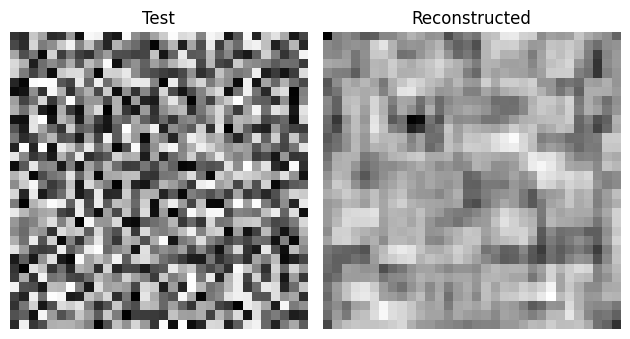

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


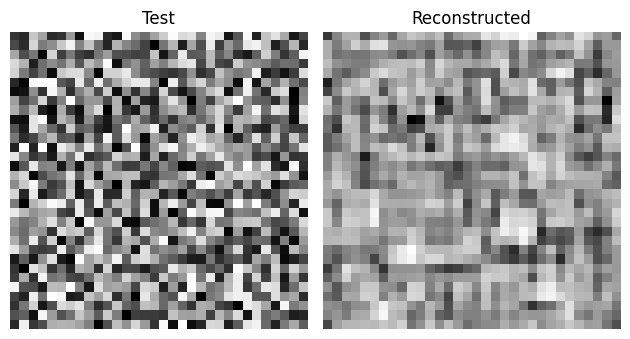

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


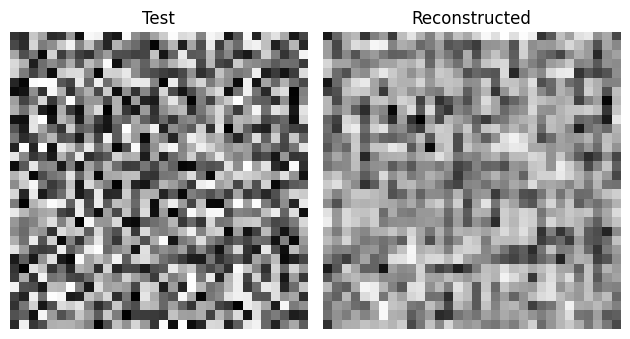

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


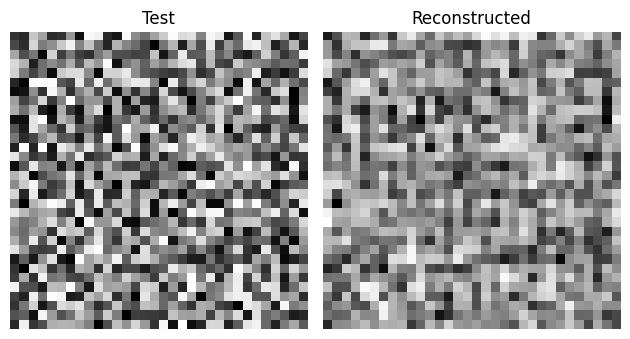

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


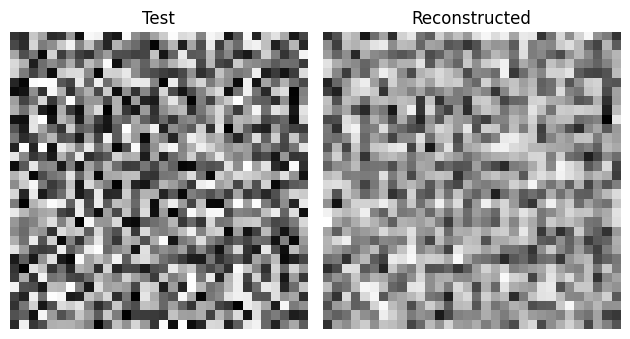

In [8]:
test_noisy_image = np.random.random((32,32,4,1))
ae = AE(test_noisy_image.shape,hidden_depth_grow_factor=3,init_hidden_depth=12,latent_dim=32*32*4)
for _ in range(5):
    ae.train(np.stack([test_noisy_image,test_noisy_image]),epochs=50,verbose=False)

    test_id = 1
    plt.subplot(1, 2, 1)
    plt.imshow(test_noisy_image.reshape((32,32,4,1))[:,:,0,:], cmap="gray")
    plt.title("Test")
    plt.axis('off')  # Hide axes for a cleaner look

    plt.subplot(1, 2, 2)
    latent = ae.encode(np.stack([test_noisy_image]))
    plt.imshow(ae.decode(latent)[0].reshape((32,32,4,1))[:,:,0,:], cmap="gray")
    plt.title("Reconstructed")
    plt.axis('off')  # Hide axes for a cleaner look
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()
